## Results

In [1]:
%matplotlib inline
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyspark.sql.functions as sf

plt.style.use('bmh')
pd.options.display.max_columns = 500

In [2]:
parts = ['0-22', '22-38', '38-64'] 

paths = []
for i in range(0, len(parts)):
    paths.append('gs://dataproc-jupyter-eileen.npo-data.nl/data/results/results' + parts[i])
results_df = spark.read.parquet(*paths)

In [2]:
features = ['broadcaster', 'credits', 'description_tfidf', 'genres', 'title_tfidf', 'sub_tfidf']

def combinations(features):
    combi = []
    for i in range(1, len(features)+1):
        combi = combi + list(itertools.combinations(features,i))
    return combi

combi = combinations(features)
combi.insert(0, None)
print(len(combi))

64


In [5]:
df = results_df.toPandas()
df.columns = ['epoch', 'train_p5', 'test_p5', 'p5_std', 'train_r-rank', 'test_r-rank', 'rank_std']
indeces = []
features = []
df = df.dropna()
for i in range(0, len(combi)):
    for j in range(0, 10):
        indeces.append(i)
        features.append(str(combi[i]))
df['combi'] = indeces
df['features'] = features
df

,epoch,train_p5,test_p5,p5_std,train_r-rank,test_r-rank,rank_std,combi,features
0,10.0,0.216880,0.058540,0.095987,0.553112,0.161482,0.226089,0,None
1,20.0,0.226018,0.060473,0.097372,0.565638,0.163970,0.222097,0,None
2,30.0,0.247191,0.064120,0.100704,0.574802,0.165837,0.219762,0,None
3,40.0,0.267395,0.064722,0.101303,0.590563,0.165653,0.217281,0,None
4,50.0,0.287412,0.061947,0.099375,0.603668,0.159770,0.212000,0,None
5,60.0,0.301943,0.062766,0.100661,0.614628,0.160367,0.211540,0,None
6,70.0,0.315522,0.061526,0.099636,0.625612,0.157625,0.209737,0,None
7,80.0,0.325113,0.059864,0.098522,0.633753,0.154918,0.207391,0,None
8,90.0,0.333698,0.058638,0.097891,0.641006,0.152935,0.206371,0,None
9,100.0,0.341486,0.058548,0.097960,0.649350,0.153074,0.206792,0,None


In [11]:
spark.createDataFrame(df).write.parquet('gs://dataproc-jupyter-eileen.npo-data.nl/data/results/results_RUN1')

## Results

In [18]:
df = spark.read.parquet('gs://dataproc-jupyter-eileen.npo-data.nl/data/results/results_RUN1')
df = df.toPandas()

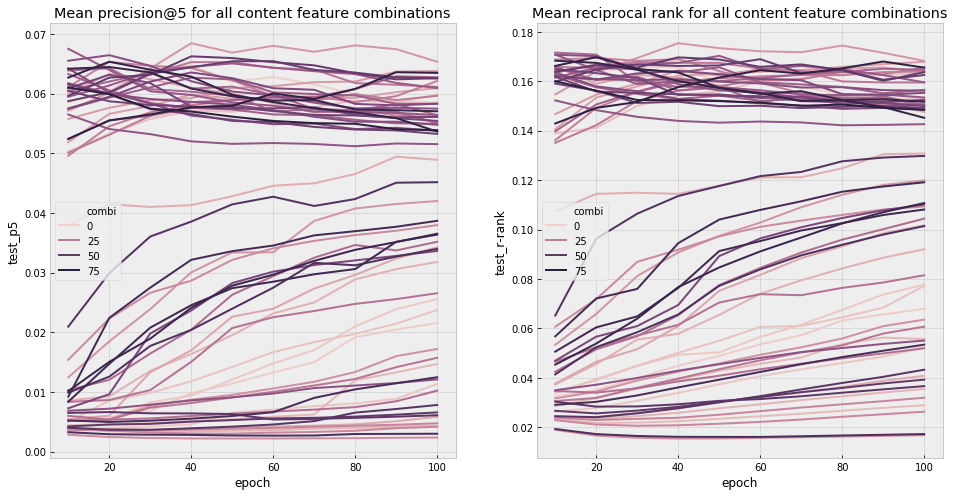

In [6]:
f, axes = plt.subplots(1, 2, figsize=(16,8))
ax = sns.lineplot(x="epoch", y="test_p5",data=df, hue='combi', ax=axes[0])
axes[0].set_title("Mean precision@5 for all content feature combinations")
ax = sns.lineplot(x="epoch", y="test_r-rank",data=df, hue='combi', ax=axes[1])
axes[1].set_title("Mean reciprocal rank for all content feature combinations")
plt.show()

In [19]:
# highest mean p@k
p5 = df.groupby(['combi'])['test_p5'].transform(max) == df['test_p5']
df_p5 = df[p5].copy()
df_p5.sort_values('test_p5', ascending=False)

,epoch,train_p5,test_p5,p5_std,train_r-rank,test_r-rank,rank_std,combi,features
163,40.0,0.252099,0.068436,0.103529,0.576538,0.175401,0.224504,16,"('description_tfidf', 'genres')"
530,10.0,0.307367,0.067489,0.102166,0.630988,0.170791,0.216670,37,"('credits', 'title_tfidf', 'sub_tfidf')"
561,20.0,0.287077,0.066429,0.102206,0.611592,0.170163,0.221113,40,"('description_tfidf', 'title_tfidf', 'sub_tfidf')"
13,40.0,0.269315,0.066233,0.102097,0.593049,0.169667,0.220348,49,"('broadcaster', 'description_tfidf', 'genres',..."
5,60.0,0.298666,0.065428,0.102739,0.614544,0.168934,0.221591,48,"('broadcaster', 'description_tfidf', 'genres',..."
131,20.0,0.273256,0.065331,0.101246,0.597665,0.169753,0.222485,61,"('broadcaster', 'description_tfidf', 'genres',..."
231,20.0,0.262533,0.065293,0.101515,0.592055,0.169412,0.222366,23,"('broadcaster', 'credits', 'genres')"
263,40.0,0.272616,0.065263,0.101283,0.595000,0.167495,0.219146,26,"('broadcaster', 'description_tfidf', 'genres')"
524,50.0,0.288848,0.065045,0.101771,0.601334,0.170288,0.223170,36,"('credits', 'genres', 'sub_tfidf')"
323,40.0,0.267395,0.064722,0.101303,0.590563,0.165653,0.217281,0,None


In [8]:
df_p5.describe()

,epoch,train_p5,test_p5,p5_std,train_r-rank,test_r-rank,rank_std,combi
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,67.031250,0.178355,0.041595,0.078318,0.407694,0.116749,0.182502,31.500000
std,38.614073,0.102893,0.023777,0.026220,0.213565,0.053744,0.041060,18.618987
min,10.000000,0.004269,0.002812,0.023613,0.026309,0.018955,0.108417,0.000000
25%,20.000000,0.083569,0.016820,0.056826,0.176883,0.062829,0.143120,15.750000
50%,100.000000,0.169686,0.047280,0.088933,0.438373,0.130125,0.200876,31.500000
75%,100.000000,0.280549,0.063500,0.100250,0.599313,0.164017,0.218883,47.250000
max,100.000000,0.307367,0.068436,0.103529,0.634153,0.175401,0.226793,63.000000


In [28]:
df_p5[df_p5['combi']==0].iloc[0]

epoch                  40
train_p5         0.267395
test_p5         0.0647216
p5_std           0.101303
train_r-rank     0.590563
test_r-rank      0.165653
rank_std         0.217281
combi                   0
features             None
Name: 323, dtype: object

In [9]:
df_p5.loc[df_p5['test_p5'].idxmax()]

epoch                                    40
train_p5                           0.252099
test_p5                           0.0684363
p5_std                             0.103529
train_r-rank                       0.576538
test_r-rank                        0.175401
rank_std                           0.224504
combi                                    16
features        (description_tfidf, genres)
Name: 163, dtype: object

In [21]:
# highest MRR
rr5 = df.groupby(['combi'])['test_r-rank'].transform(max) == df['test_r-rank']
df_rr5 = df[rr5].copy()
df_rr5.sort_values('test_r-rank', ascending=False)

,epoch,train_p5,test_p5,p5_std,train_r-rank,test_r-rank,rank_std,combi,features
163,40.0,0.252099,0.068436,0.103529,0.576538,0.175401,0.224504,16,"('description_tfidf', 'genres')"
310,10.0,0.244092,0.063857,0.099392,0.582001,0.171601,0.226741,31,"('broadcaster', 'title_tfidf', 'sub_tfidf')"
530,10.0,0.307367,0.067489,0.102166,0.630988,0.170791,0.216670,37,"('credits', 'title_tfidf', 'sub_tfidf')"
560,10.0,0.246660,0.065489,0.100839,0.586897,0.170732,0.222871,40,"('description_tfidf', 'title_tfidf', 'sub_tfidf')"
524,50.0,0.288848,0.065045,0.101771,0.601334,0.170288,0.223170,36,"('credits', 'genres', 'sub_tfidf')"
131,20.0,0.273256,0.065331,0.101246,0.597665,0.169753,0.222485,61,"('broadcaster', 'description_tfidf', 'genres',..."
13,40.0,0.269315,0.066233,0.102097,0.593049,0.169667,0.220348,49,"('broadcaster', 'description_tfidf', 'genres',..."
231,20.0,0.262533,0.065293,0.101515,0.592055,0.169412,0.222366,23,"('broadcaster', 'credits', 'genres')"
5,60.0,0.298666,0.065428,0.102739,0.614544,0.168934,0.221591,48,"('broadcaster', 'description_tfidf', 'genres',..."
120,10.0,0.245435,0.064158,0.099591,0.584641,0.168321,0.220431,60,"('broadcaster', 'credits', 'genres', 'title_tf..."


In [11]:
df_rr5.loc[df_rr5['test_r-rank'].idxmax()]

epoch                                    40
train_p5                           0.252099
test_p5                           0.0684363
p5_std                             0.103529
train_r-rank                       0.576538
test_r-rank                        0.175401
rank_std                           0.224504
combi                                    16
features        (description_tfidf, genres)
Name: 163, dtype: object

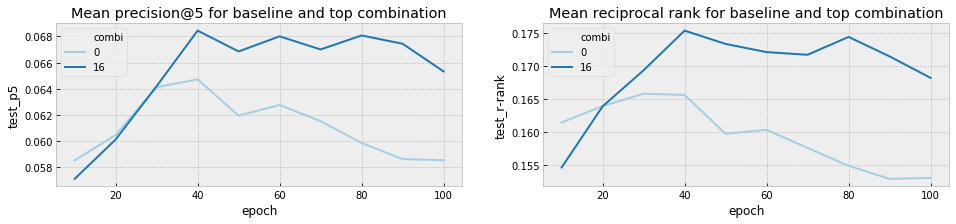

In [20]:
high_base = [0, 16]
df_16 = df[df['combi'].isin(high_base)].copy()
f, axes = plt.subplots(1, 2, figsize=(16,3))
ax = sns.lineplot(x="epoch", y="test_p5",data=df_16, hue='combi', palette=sns.color_palette("Paired", 2), ax=axes[0])
axes[0].set_title("Mean precision@5 for baseline and top combination")
ax = sns.lineplot(x="epoch", y="test_r-rank",data=df_16, hue='combi', palette=sns.color_palette("Paired", 2), ax=axes[1])
axes[1].set_title("Mean reciprocal rank for baseline and top combination")
plt.show()

### Standard deviation

(Is there a relation between high precision/ r-rank and low std?)

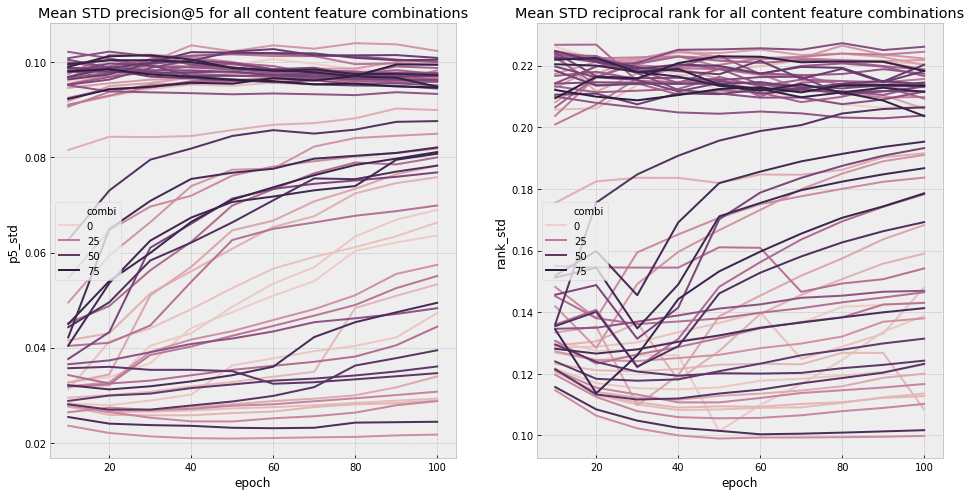

In [53]:
f, axes = plt.subplots(1, 2, figsize=(16,8))
ax = sns.lineplot(x="epoch", y="p5_std",data=df, hue='combi', ax=axes[0])
axes[0].set_title("Mean STD precision@5 for all content feature combinations")
ax = sns.lineplot(x="epoch", y="rank_std",data=df, hue='combi', ax=axes[1])
axes[1].set_title("Mean STD reciprocal rank for all content feature combinations")
plt.show()

In [54]:
p5_std = df.groupby(['combi'])['p5_std'].transform(min) == df['p5_std']
df_p5_std = df[p5_std].copy()
print(df_p5_std.loc[df_p5_std['p5_std'].idxmin()])
print(combi[19])

epoch                                  50
train_p5                        0.0051194
test_p5                         0.0021807
p5_std                          0.0209141
train_r-rank                    0.0234468
test_r-rank                     0.0154402
rank_std                        0.0989974
combi                                  19
features        ('genres', 'title_tfidf')
Name: 194, dtype: object
('genres', 'title_tfidf')


In [55]:
rr5_std = df.groupby(['combi'])['rank_std'].transform(min) == df['rank_std']
df_rr5_std = df[rr5_std].copy()
print(df_rr5_std.loc[df_rr5_std['rank_std'].idxmin()])
print(combi[19])

epoch                                  50
train_p5                        0.0051194
test_p5                         0.0021807
p5_std                          0.0209141
train_r-rank                    0.0234468
test_r-rank                     0.0154402
rank_std                        0.0989974
combi                                  19
features        ('genres', 'title_tfidf')
Name: 194, dtype: object
('genres', 'title_tfidf')


## V2

In [3]:
# parts = ['0-22', '22-40', '40-64']
parts = ['0-22(2)', '22-28(2)', '28-50(2)', '50-64(2)'] #(2)
# parts = ['0-22(3)', '22-64(3)'] #(3)

paths = []
for i in range(0, len(parts)):
    paths.append('gs://dataproc-jupyter-eileen.npo-data.nl/data/results/marchv2results' + parts[i])
results_df = spark.read.parquet(*paths)

In [4]:
df = results_df.toPandas()
df.columns = ['epoch', 'test_p5', 'p5_std', 'test_p52', 'p5_std2', 'test_r-rank', 'rank_std', 'test_r-rank2', 'rank_std2']
indeces = []
features = []
df = df.dropna()
for i in range(0, len(combi)):
    for j in range(0, 10):
        indeces.append(i)
        features.append(str(combi[i]))
df['combi'] = indeces
df['features'] = features
df

,epoch,test_p5,p5_std,test_p52,p5_std2,test_r-rank,rank_std,test_r-rank2,rank_std2,combi,features
0,10.0,0.088997,0.111679,0.074194,0.099896,0.229700,0.254395,0.208980,0.240890,0,None
1,20.0,0.100035,0.115013,0.075806,0.100299,0.265692,0.281262,0.230500,0.268248,0,None
2,30.0,0.105844,0.116553,0.085484,0.102149,0.287992,0.297549,0.231303,0.255734,0,None
3,40.0,0.111871,0.117415,0.082258,0.101639,0.311583,0.313819,0.245085,0.271934,0,None
4,50.0,0.114749,0.118300,0.082258,0.098414,0.317552,0.315170,0.238103,0.271585,0,None
5,60.0,0.117268,0.118307,0.085484,0.098941,0.330382,0.324537,0.243325,0.271618,0,None
6,70.0,0.120365,0.118672,0.091935,0.099674,0.344043,0.332735,0.264537,0.283121,0,None
7,80.0,0.122466,0.118747,0.090323,0.099531,0.352995,0.338196,0.271441,0.294165,0,None
8,90.0,0.123301,0.119181,0.088710,0.099361,0.354661,0.338381,0.271413,0.288991,0,None
9,100.0,0.125608,0.119559,0.095161,0.099883,0.361613,0.341125,0.274420,0.289314,0,None


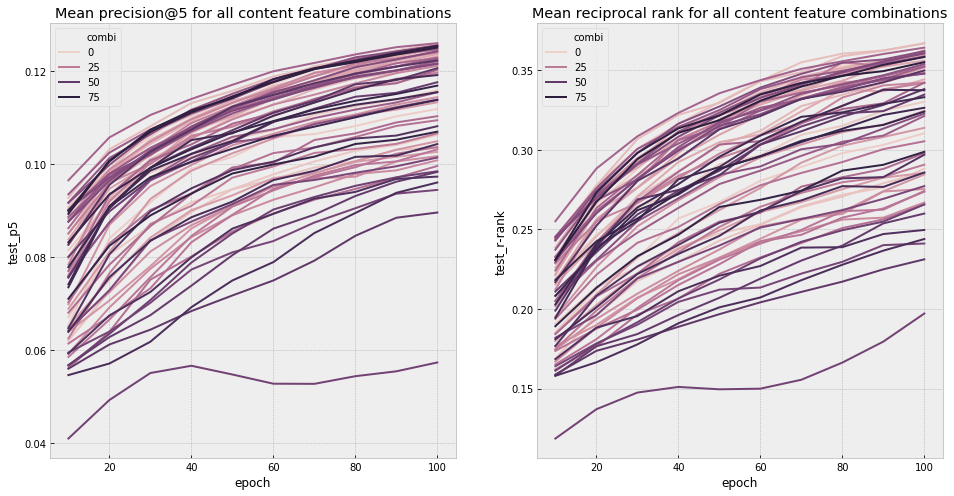

In [5]:
f, axes = plt.subplots(1, 2, figsize=(16,8))
ax = sns.lineplot(x="epoch", y="test_p5",data=df, hue='combi', ax=axes[0])
axes[0].set_title("Mean precision@5 for all content feature combinations")
ax = sns.lineplot(x="epoch", y="test_r-rank",data=df, hue='combi', ax=axes[1])
axes[1].set_title("Mean reciprocal rank for all content feature combinations")
plt.show()

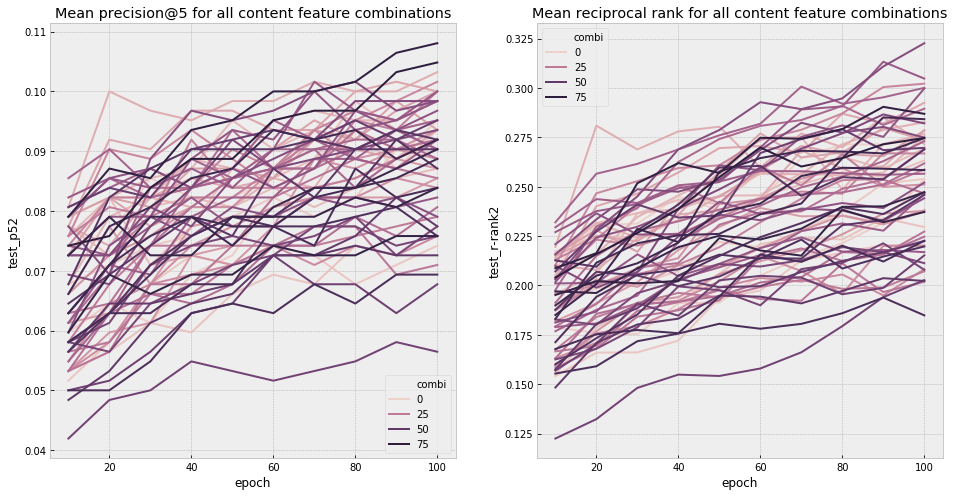

In [6]:
f, axes = plt.subplots(1, 2, figsize=(16,8))
ax = sns.lineplot(x="epoch", y="test_p52",data=df, hue='combi', ax=axes[0])
axes[0].set_title("Mean precision@5 for all content feature combinations")
ax = sns.lineplot(x="epoch", y="test_r-rank2",data=df, hue='combi', ax=axes[1])
axes[1].set_title("Mean reciprocal rank for all content feature combinations")
plt.show()

### precision

In [18]:
df_p5.sort_values('test_p5', ascending=False)

,epoch,test_p5,p5_std,test_p52,p5_std2,test_r-rank,rank_std,test_r-rank2,rank_std2,combi,features
372,100.0,0.126026,0.118594,0.095161,0.099883,0.364226,0.342306,0.300071,0.325672,33,"('credits', 'description_tfidf', 'title_tfidf')"
75,100.0,0.125916,0.119395,0.087097,0.102365,0.367038,0.345576,0.269369,0.311793,6,"('sub_tfidf',)"
9,100.0,0.125608,0.119559,0.095161,0.099883,0.361613,0.341125,0.274420,0.289314,0,None
460,100.0,0.125557,0.119204,0.098387,0.099987,0.361989,0.341073,0.322687,0.339459,41,"('genres', 'title_tfidf', 'sub_tfidf')"
691,100.0,0.125467,0.118401,0.108065,0.105949,0.358368,0.337406,0.286908,0.285601,62,"('credits', 'description_tfidf', 'genres', 'ti..."
427,100.0,0.125428,0.118778,0.098387,0.099987,0.360851,0.340663,0.299768,0.318172,38,"('description_tfidf', 'genres', 'title_tfidf')"
702,100.0,0.125100,0.118663,0.104839,0.099883,0.355116,0.334946,0.274693,0.263452,63,"('broadcaster', 'credits', 'description_tfidf'..."
64,100.0,0.124998,0.118349,0.095161,0.103062,0.366886,0.345265,0.263298,0.283790,5,"('title_tfidf',)"
119,100.0,0.124946,0.119160,0.103226,0.103125,0.360758,0.341101,0.271533,0.278515,10,"('broadcaster', 'title_tfidf')"
405,100.0,0.124773,0.118689,0.100000,0.103175,0.358524,0.338760,0.304766,0.314971,36,"('credits', 'genres', 'sub_tfidf')"


In [7]:
# highest mean p@k
p5 = df.groupby(['combi'])['test_p5'].transform(max) == df['test_p5']
df_p5 = df[p5].copy()
df_p5.sort_values('test_p5', ascending=False)
df_p5.loc[df_p5['test_p5'].idxmax()]

epoch                                                       100
test_p5                                                0.126026
p5_std                                                 0.118594
test_p52                                              0.0951613
p5_std2                                               0.0998829
test_r-rank                                            0.364226
rank_std                                               0.342306
test_r-rank2                                           0.300071
rank_std2                                              0.325672
combi                                                        33
features        ('credits', 'description_tfidf', 'title_tfidf')
Name: 372, dtype: object

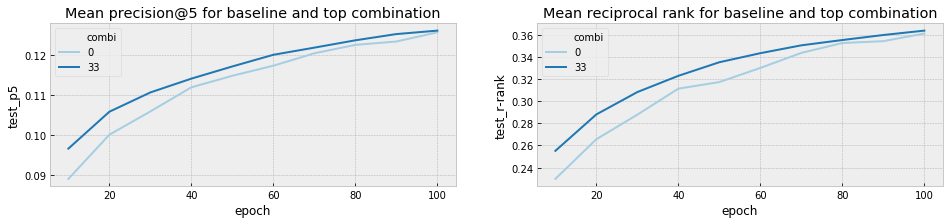

In [19]:
high_base = [0, 33]
df_50 = df[df['combi'].isin(high_base)].copy()
f, axes = plt.subplots(1, 2, figsize=(16,3))
ax = sns.lineplot(x="epoch", y="test_p5",data=df_50, hue='combi', palette=sns.color_palette("Paired", 2), ax=axes[0])
axes[0].set_title("Mean precision@5 for baseline and top combination")
ax = sns.lineplot(x="epoch", y="test_r-rank",data=df_50, hue='combi', palette=sns.color_palette("Paired", 2), ax=axes[1])
axes[1].set_title("Mean reciprocal rank for baseline and top combination")
plt.show()

In [9]:
# highest mean p@k
p52 = df.groupby(['combi'])['test_p52'].transform(max) == df['test_p52']
df_p52 = df[p52].copy()
df_p52.sort_values('test_p52', ascending=False)
df_p52.loc[df_p52['test_p52'].idxmax()]

epoch                                                         100
test_p5                                                  0.125467
p5_std                                                   0.118401
test_p52                                                 0.108065
p5_std2                                                  0.105949
test_r-rank                                              0.358368
rank_std                                                 0.337406
test_r-rank2                                             0.286908
rank_std2                                                0.285601
combi                                                          62
features        ('credits', 'description_tfidf', 'genres', 'ti...
Name: 691, dtype: object

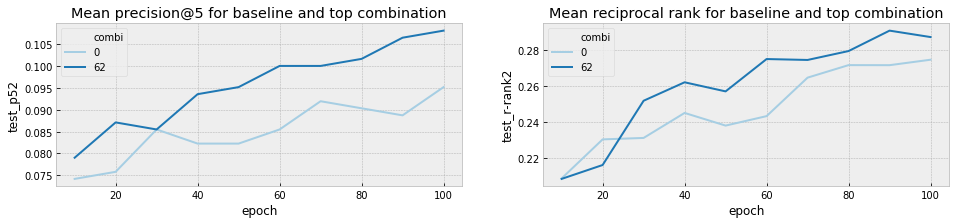

In [20]:
high_base = [0, 62]
df_54 = df[df['combi'].isin(high_base)].copy()
f, axes = plt.subplots(1, 2, figsize=(16,3))
ax = sns.lineplot(x="epoch", y="test_p52",data=df_54, hue='combi', palette=sns.color_palette("Paired", 2), ax=axes[0])
axes[0].set_title("Mean precision@5 for baseline and top combination")
ax = sns.lineplot(x="epoch", y="test_r-rank2",data=df_54, hue='combi', palette=sns.color_palette("Paired", 2), ax=axes[1])
axes[1].set_title("Mean reciprocal rank for baseline and top combination")
plt.show()

### rank

In [23]:
df_rr5.sort_values('test_r-rank', ascending=False)

,epoch,test_p5,p5_std,test_p52,p5_std2,test_r-rank,rank_std,test_r-rank2,rank_std2,combi,features
75,100.0,0.125916,0.119395,0.087097,0.102365,0.367038,0.345576,0.269369,0.311793,6,"('sub_tfidf',)"
64,100.0,0.124998,0.118349,0.095161,0.103062,0.366886,0.345265,0.263298,0.283790,5,"('title_tfidf',)"
372,100.0,0.126026,0.118594,0.095161,0.099883,0.364226,0.342306,0.300071,0.325672,33,"('credits', 'description_tfidf', 'title_tfidf')"
240,100.0,0.124606,0.118322,0.101613,0.099987,0.362461,0.343119,0.302183,0.313583,21,"('title_tfidf', 'sub_tfidf')"
460,100.0,0.125557,0.119204,0.098387,0.099987,0.361989,0.341073,0.322687,0.339459,41,"('genres', 'title_tfidf', 'sub_tfidf')"
9,100.0,0.125608,0.119559,0.095161,0.099883,0.361613,0.341125,0.274420,0.289314,0,None
97,100.0,0.124233,0.118215,0.098387,0.103163,0.360871,0.341007,0.276791,0.300342,8,"('broadcaster', 'description_tfidf')"
427,100.0,0.125428,0.118778,0.098387,0.099987,0.360851,0.340663,0.299768,0.318172,38,"('description_tfidf', 'genres', 'title_tfidf')"
119,100.0,0.124946,0.119160,0.103226,0.103125,0.360758,0.341101,0.271533,0.278515,10,"('broadcaster', 'title_tfidf')"
471,100.0,0.124297,0.118798,0.098387,0.103163,0.360554,0.340910,0.274901,0.297410,42,"('broadcaster', 'credits', 'description_tfidf'..."


In [11]:
# highest mean reciprocal rank
rr5 = df.groupby(['combi'])['test_r-rank'].transform(max) == df['test_r-rank']
df_rr5 = df[rr5].copy()
df_rr5.sort_values('test_r-rank', ascending=False)
df_rr5.loc[df_rr5['test_r-rank'].idxmax()]

epoch                      100
test_p5               0.125916
p5_std                0.119395
test_p52             0.0870968
p5_std2               0.102365
test_r-rank           0.367038
rank_std              0.345576
test_r-rank2          0.269369
rank_std2             0.311793
combi                        6
features        ('sub_tfidf',)
Name: 75, dtype: object

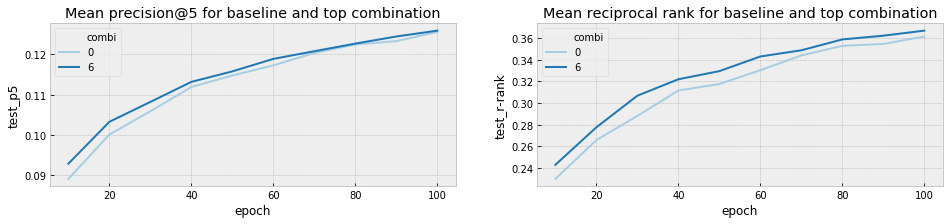

In [21]:
high_base = [0, 6]
df_50_rr = df[df['combi'].isin(high_base)].copy()
f, axes = plt.subplots(1, 2, figsize=(16,3))
ax = sns.lineplot(x="epoch", y="test_p5",data=df_50_rr, hue='combi', palette=sns.color_palette("Paired", 2), ax=axes[0])
axes[0].set_title("Mean precision@5 for baseline and top combination")
ax = sns.lineplot(x="epoch", y="test_r-rank",data=df_50_rr, hue='combi', palette=sns.color_palette("Paired", 2), ax=axes[1])
axes[1].set_title("Mean reciprocal rank for baseline and top combination")
plt.show()

In [14]:
# highest mean reciprocal rank
rr52 = df.groupby(['combi'])['test_r-rank2'].transform(max) == df['test_r-rank2']
df_rr52 = df[rr52].copy()
df_rr52.sort_values('test_r-rank2', ascending=False)
df_rr52.loc[df_rr52['test_r-rank2'].idxmax()]

epoch                                              100
test_p5                                       0.125557
p5_std                                        0.119204
test_p52                                     0.0983871
p5_std2                                       0.099987
test_r-rank                                   0.361989
rank_std                                      0.341073
test_r-rank2                                  0.322687
rank_std2                                     0.339459
combi                                               41
features        ('genres', 'title_tfidf', 'sub_tfidf')
Name: 460, dtype: object

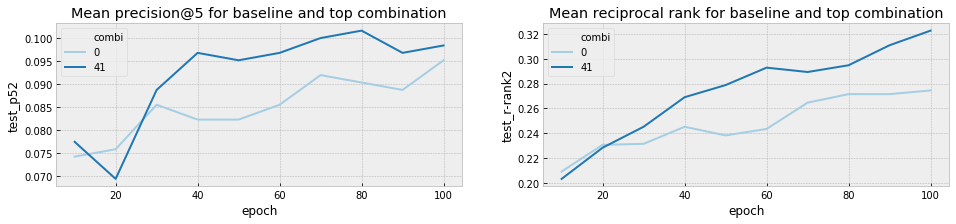

In [22]:
high_base = [0, 41]
df_41_rr = df[df['combi'].isin(high_base)].copy()
f, axes = plt.subplots(1, 2, figsize=(16,3))
ax = sns.lineplot(x="epoch", y="test_p52",data=df_41_rr, hue='combi', palette=sns.color_palette("Paired", 2), ax=axes[0])
axes[0].set_title("Mean precision@5 for baseline and top combination")
ax = sns.lineplot(x="epoch", y="test_r-rank2",data=df_41_rr, hue='combi', palette=sns.color_palette("Paired", 2), ax=axes[1])
axes[1].set_title("Mean reciprocal rank for baseline and top combination")
plt.show()

## RQ3

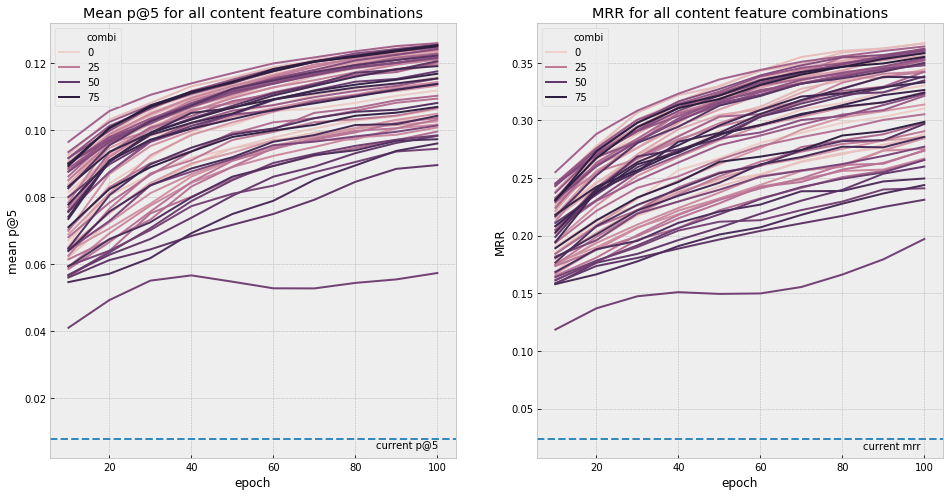

In [16]:
f, axes = plt.subplots(1, 2, figsize=(16,8))
ax = sns.lineplot(x="epoch", y="test_p5",data=df, hue='combi', ax=axes[0])
axes[0].set_title("Mean p@5 for all content feature combinations")
axes[0].set(ylabel='mean p@5')
axes[0].axhline(0.008, ls='--')
axes[0].text(85, 0.005, "current p@5")
ax = sns.lineplot(x="epoch", y="test_r-rank",data=df, hue='combi', ax=axes[1])
axes[1].set_title("MRR for all content feature combinations")
axes[1].set(ylabel='MRR')
axes[1].axhline(0.024, ls='--')
axes[1].text(85, 0.015, "current mrr")
plt.show()

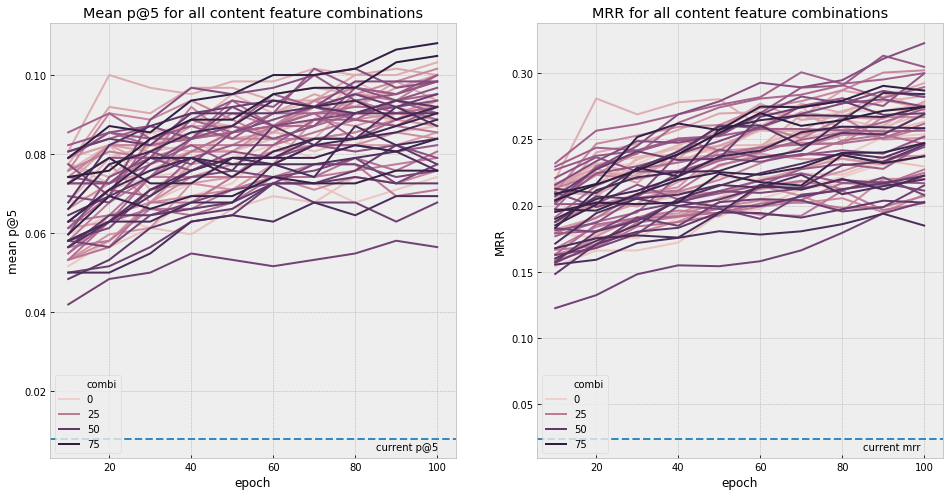

In [17]:
f, axes = plt.subplots(1, 2, figsize=(16,8))
ax = sns.lineplot(x="epoch", y="test_p52",data=df, hue='combi', ax=axes[0])
axes[0].set_title("Mean p@5 for all content feature combinations")
axes[0].set(ylabel='mean p@5')
axes[0].axhline(0.008, ls='--')
axes[0].text(85, 0.005, "current p@5")
ax = sns.lineplot(x="epoch", y="test_r-rank2",data=df, hue='combi', ax=axes[1])
axes[1].set_title("MRR for all content feature combinations")
axes[1].set(ylabel='MRR')
axes[1].axhline(0.024, ls='--')
axes[1].text(85, 0.015, "current mrr")
plt.show()